# Iris Flower Classification: 
- The aim is to classify iris flowers among three species (Setosa, Versicolor or Virginica) from the sepals and petals length and width measurements

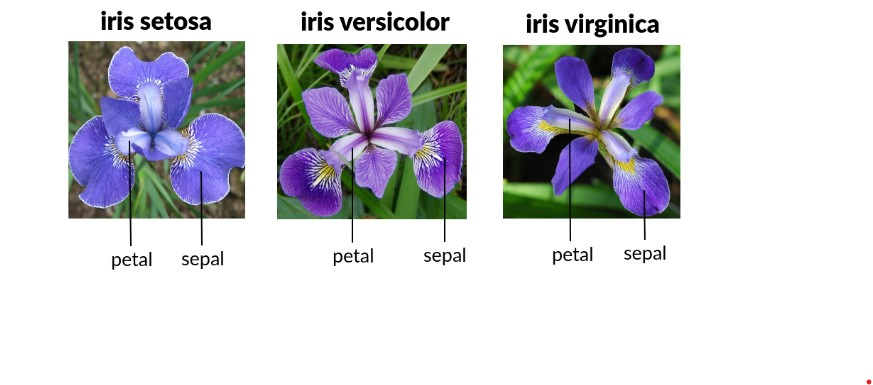

In [1]:
#importing liberary
import sklearn 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#### Loading Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length","sepal_width","petal_length","petal_width","class"]
iris_data = pd.read_csv(url, names = column_names)

In [3]:
#Displaying the dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Ploting garphs

<Axes: >

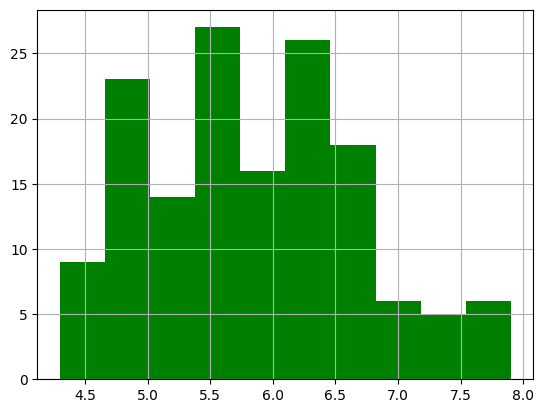

In [34]:
iris_data["sepal_length"].hist(color = "green")

<Axes: >

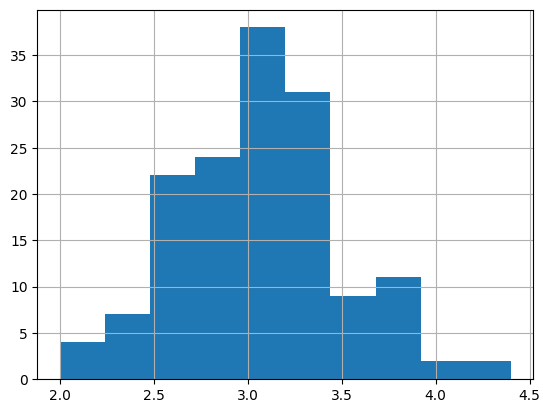

In [30]:
iris_data["sepal_width"].hist()

<Axes: >

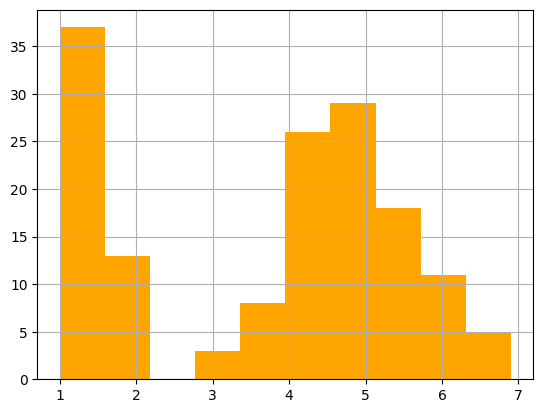

In [35]:
iris_data["petal_length"].hist(color = "orange")

<Axes: >

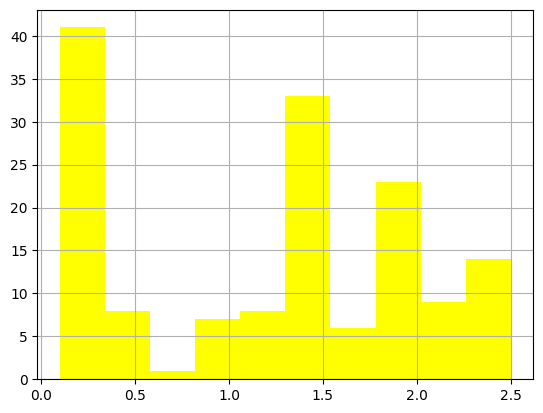

In [36]:
iris_data["petal_width"].hist(color = "yellow")

In [4]:
#Displaying data from 50 to 100
iris_data.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,class
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [5]:
#Getting the description of data
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### Ploting a graph 

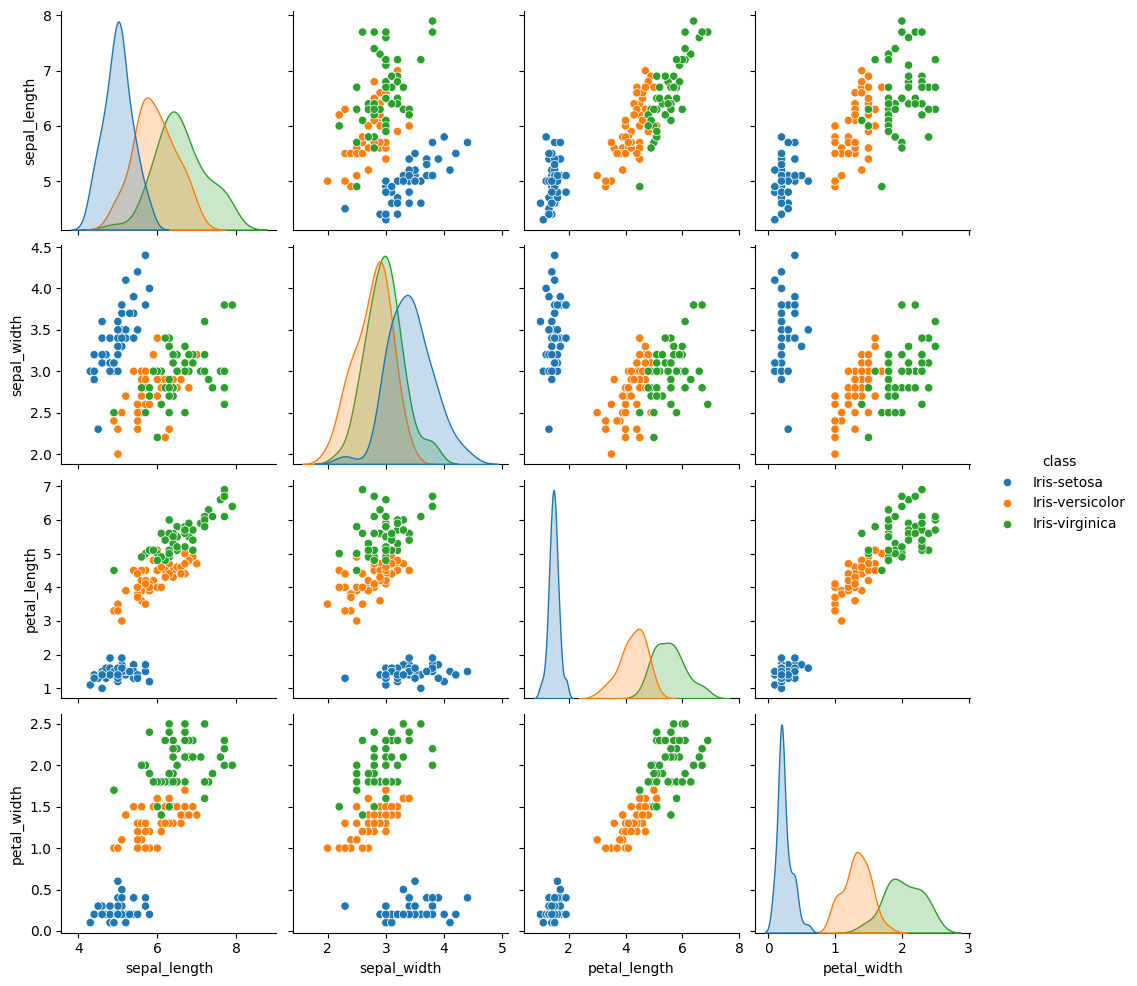

In [6]:
sns.pairplot(iris_data, hue = "class")
plt.show()

### Analysis from Pair Plot
- The iris - setosa is seprated in every pairplot
- Iris - setosa has the highest petal length and petal width 
- Sepal width and sepal length of Iris - versicolor and virginica are similar
- petal_length differniate all thre of them

In [7]:
#spliting data into train and test with scikit - learn
# x is to reprsent independent feature
X = iris_data.drop("class", axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
#y is dependent variable 
y = iris_data["class"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [9]:
# To get the numbers of types present in data set
iris_data["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='class'>

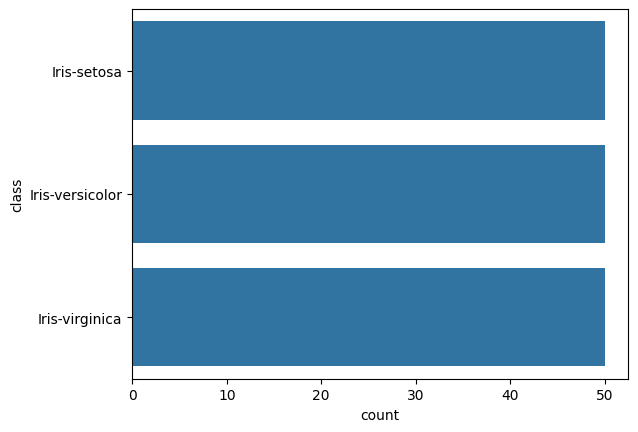

In [42]:
#Visulizing count plot
sns.countplot(iris_data['class'])

In [14]:
#spliting training  and test set
#training data set will be use to train  the model and testing data set will be used to test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the dimensions of training and testing data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

#use knn classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


KNeighborsClassifier(n_neighbors=3)

In [15]:
#Checking accuracy of the model
y_prd = knn.predict(X_test)

In [17]:
#Comparing predicted vvalue with the actual values
print("Accuracy:",accuracy_score(y_test,y_prd))

Accuracy: 1.0


#### conclusion:
- The model has 100 perecent of accuracy means values are y_test is similar to values of y_train

In [18]:
#geting classification reports of the model
print(classification_report(y_test, y_prd))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [20]:
#predicting new values
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [23]:
new_data = pd.DataFrame({"sepal_length":[5.1], "sepal_width": 3.5, "petal_length": 1.4,"petal_width":0.2})

In [26]:
#prediction by calling our knn model
prediction = knn.predict(new_data)
prediction[0]

'Iris-setosa'

### Conclusion on Classification
Flower classification is a very important, simple, and basic project for any machine learning student. Every machine learning student should be thorough with the iris flowers dataset. This classification can be done by many classification algorithms in machine learning but in our article, we used logistic regression. Overall in this article, we have seen

- We took Iris Flowers dataset and performed a KNN classifier
- Finally, it classified flowers into their species.
- And we got an accuracy of 97.37%, which shows that the model we built is very accurate.